# Aplikace maticového počtu v geometrii

Pomocí matic dokážeme efektivně popsat transformaci roviny nebo projekci prostoru do roviny. Ukážeme si toto využití matic na jednoduchých příkladech. Ukážeme si i triky, jak obejít omezení plynoucí z vlastností násobení, a to že počátek se zobrazuje na počátek a rovnoběžky se zobrazují na rovnoběžky. Ukážeme si, že zavedením homogenních souřadnic je možné do repertoáru transformací vyjádřitelných maticemi je možno započítat i posunutí a perspektivu.

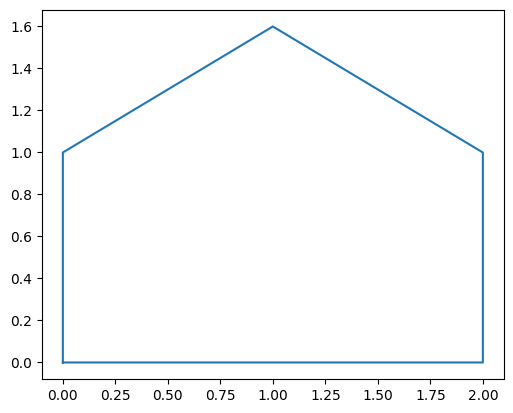

In [2]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)
from numpy import sqrt, sin, cos, pi
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
vzory=np.array([[0,0],[2,0],[2,1],[1,1.6],[0,1],[0,0]]).T
plt.plot(*vzory)
plt.gca().set_aspect('equal')


## Transformace roviny

### Kartézské souřadnice

Modrý domeček postupně zobrazujeme různými maticemi.

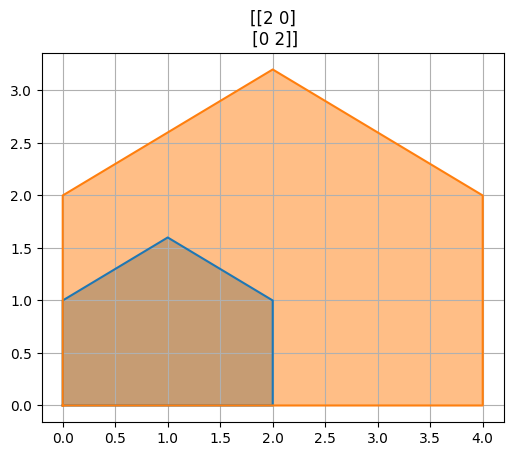

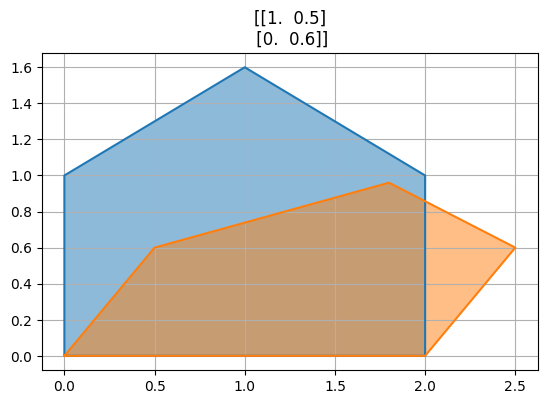

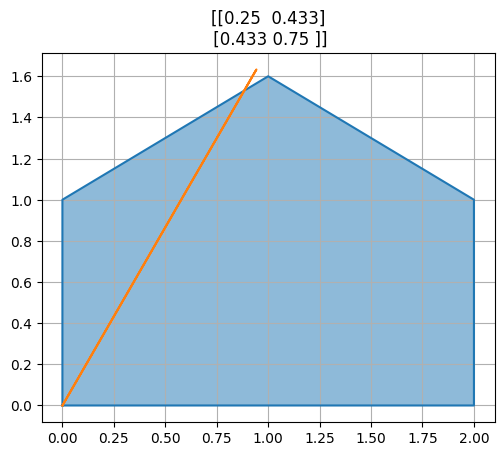

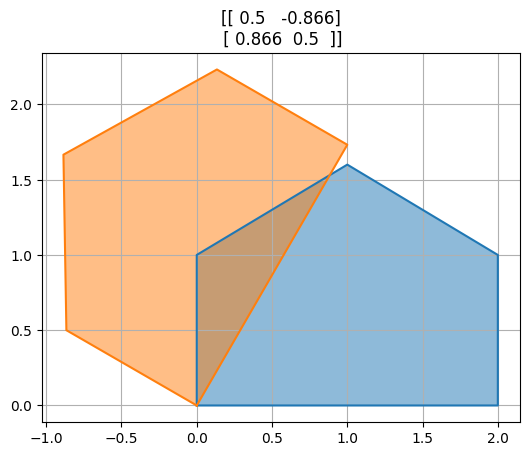

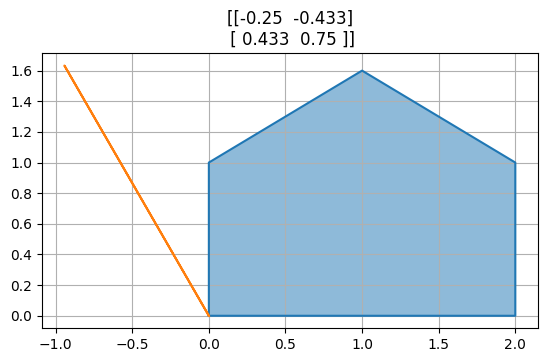

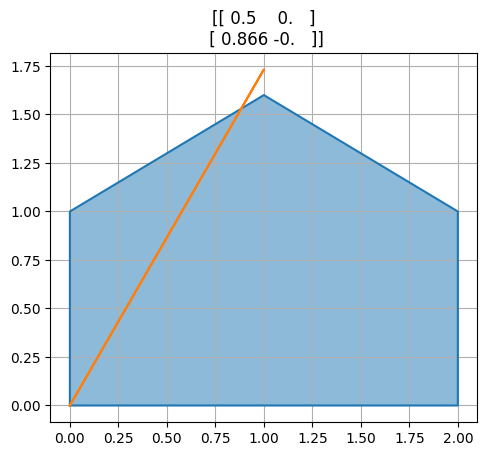

In [4]:
A=np.array([[2,0],[0,2]])
B=np.array([[1,0.5],[0,0.6]])
theta=pi/3
P=np.array([[cos(theta)**2,sin(theta)*cos(theta)],[sin(theta)*cos(theta),sin(theta)**2]]) # projekce
R=np.array([[cos(theta),-sin(theta)],[sin(theta),cos(theta)]]) # rotace

def transformuj(M, vzory=vzory):
    obrazy = M @ vzory
    fig,ax = plt.subplots()
    poly = Polygon(vzory.T, facecolor='C0', alpha=0.5)
    ax.add_patch(poly)
    poly = Polygon(obrazy.T, facecolor='C1', alpha=0.5)
    ax.add_patch(poly)
    ax.plot(*vzory, *obrazy)
    ax.set(title=M)
    ax.set_aspect('equal')
    ax.grid()

for M in [A,B,P,R,R@P,P@R]:
    transformuj(M)
    

### Homogenní souřadnice

Homogenní souřadnice umožňují i posunutí. Neplatí zde, že počátek se nutně
zobrazuje na počátek.

Obrázek v homogenních souřadnicích: 
 [[0.  2.  2.  1.  0.  0. ]
 [0.  0.  1.  1.6 1.  0. ]
 [1.  1.  1.  1.  1.  1. ]]


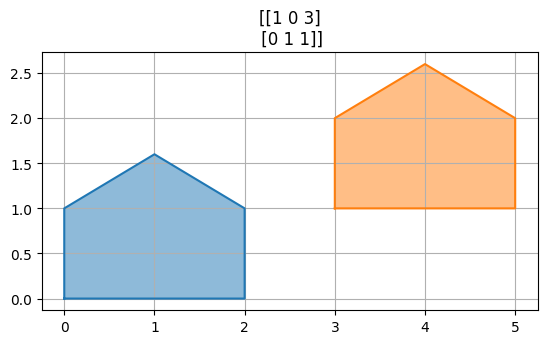

In [3]:
vzory_h = np.zeros((vzory.shape[0] + 1, vzory.shape[1]))
vzory_h[:2,:] = vzory
vzory_h[2,:] = 1
print("Obrázek v homogenních souřadnicích: \n",vzory_h)
M = np.array([1,0,3,0,1,1]).reshape((2,3))
obrazy = M @ vzory_h
fig,ax = plt.subplots()
poly = Polygon(vzory.T, facecolor='C0', alpha=0.5)
ax.add_patch(poly)
poly = Polygon(obrazy.T, facecolor='C1', alpha=0.5)
ax.add_patch(poly)
ax.plot(*vzory, *obrazy)
ax.set(title=M)
ax.set_aspect('equal')
ax.grid()


## Transformace prostoru do roviny

### Afinní transformace

In [7]:
vzory3d = np.zeros((3,12))
vzory3d[:2,:] = np.tile(vzory,2)
vzory3d[2,6:] = 1.7
vzory3d

array([[0. , 2. , 2. , 1. , 0. , 0. , 0. , 2. , 2. , 1. , 0. , 0. ],
       [0. , 0. , 1. , 1.6, 1. , 0. , 0. , 0. , 1. , 1.6, 1. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1.7, 1.7, 1.7, 1.7, 1.7, 1.7]])

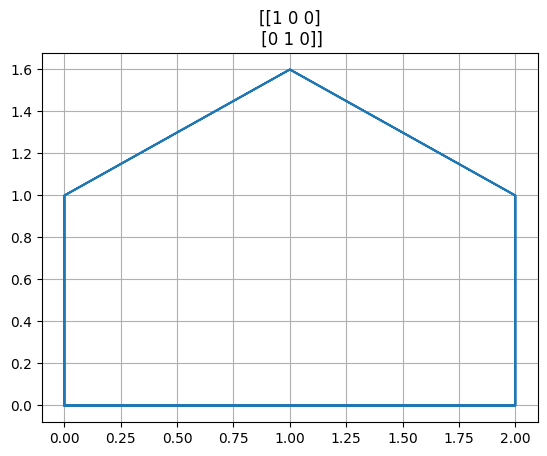

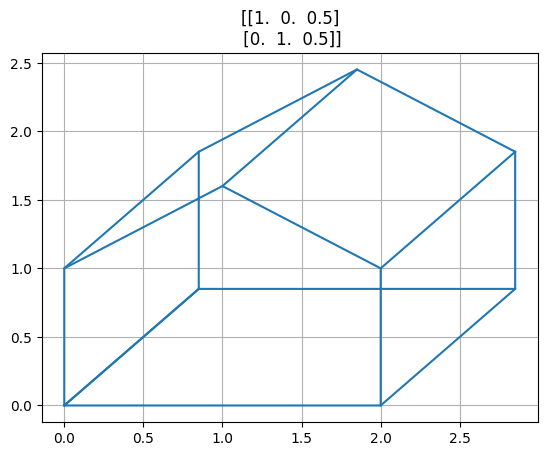

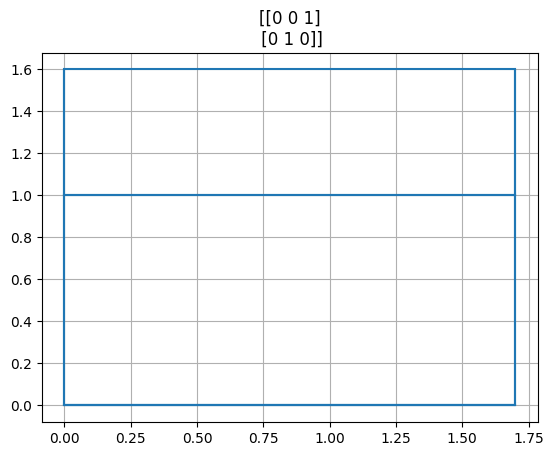

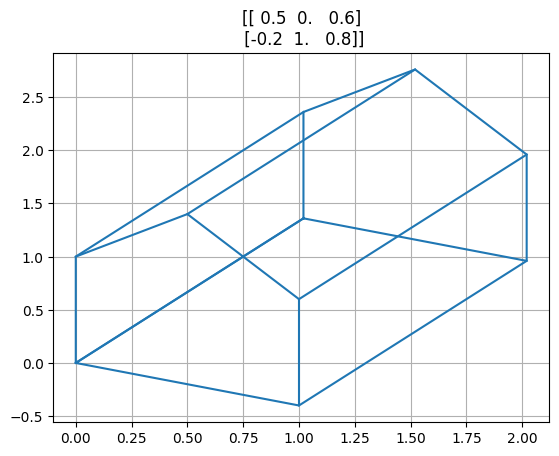

In [8]:
Matice=[
    np.array([[1,0,0],[0,1,0]]), 
    np.array([[1,0,0.5],[0,1,.5]]), 
    np.array([[0,0,1],[0,1,0]]), 
    np.array([[0.5,0,.6],[-.2,1,.8]]), 
]

for A in Matice:
    projekce = A @ vzory3d
    fig, ax = plt.subplots()
    plt.plot(*projekce,"C0")
    for i in range(5):
        plt.plot(projekce[0,i::6], projekce[1,i::6], 'C0')
        ax.set(title=A)
        ax.grid()



### Perspektiva

Viz [Wikipedie](https://en.wikipedia.org/wiki/Camera_matrix)

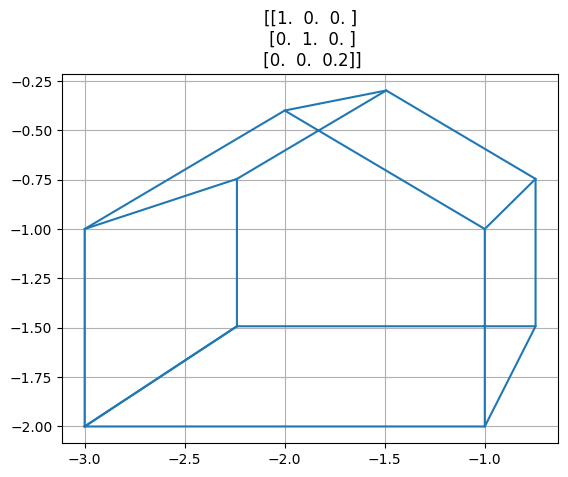

In [9]:
f=5
v = vzory3d + np.array([[-3,-2,5]]).T # posun obrazku mimo pocatek soustavy souřadnic

M = np.diag([1,1,1/f]) # projekcni matice
o = M @ v # aplikace matice
o = o / o[2,:] # prevod z homogennich souradnic na kartezske

fig, ax = plt.subplots()
ax.plot(*o[:2,:],"C0")
for i in range(5):
    ax.plot(o[0,i::6], o[1,i::6], 'C0')
ax.set(title=M)
ax.grid();
